In [45]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
import pickle 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import corner

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import sys, platform, os
from numpy import sqrt, sin, cos, pi
import scipy.constants as cst

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

In [2]:
import scipy.integrate as integrate
import scipy.special as special     
from scipy.interpolate import CubicSpline
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.integrate import quad, dblquad

In [3]:
train_params = np.load('LHS_params_1dim5000.npz')                  

In [4]:
print(train_params.files)                                       # Each of the keys has an 'np.array' of values

['h']


In [5]:
#print(train_params['omega_b'])

n_samples = len(train_params['h'])
print('number of training samples: ', len(train_params['h'])) 

number of training samples:  5000


In [6]:
cosmo_params = np.zeros((len(train_params['h']), 1))
print(cosmo_params[199])

cosmo_params[:, 0] = train_params['h']
#cosmo_params[:, 3] = train_params['ns']
#cosmo_params[:, 4] = train_params['z']
#cosmo_params[:, 5] = train_params['lnAs']
#cosmo_params[:, 6] = train_params['w']

[0.]


In [7]:
print(cosmo_params[0])
print(cosmo_params[199])

[0.73560312]
[0.79955191]


In [8]:
len(train_params['h'])

5000

In [9]:
#%%time
## Training input params:
h = cosmo_params[:, 0]

In [10]:
# np.shape(pk_matrix)                          #1400x400: 1400 cosmologies/n_samples, each with 400 pts/elements in array
# print(pk_matrix[199])

In [11]:
with open('pk_data_1dim5000.pkl', 'rb') as f:
    pk_matrix = pickle.load(f)

In [12]:
# Training input params and output param:

train_H0 = 100*h                               #1x400                     # np.arrays, sizes len(train_params['h'])
train_pk = pk_matrix                           #400x1400                   # don't need kh, stays the same

In [13]:
input_params = np.vstack([train_H0])        # n_samples = no. of rows

input_params_transpose = np.transpose(input_params)
print(np.shape(input_params_transpose))
print(np.shape(train_pk))

input_data = pd.DataFrame(input_params_transpose)
input_data.columns = ['H0']

output_data = pd.DataFrame(train_pk)                                       
print( input_data)                                                         #800x3
#print(output_data)

(5000, 1)
(5000, 2000)
             H0
0     73.560312
1     72.072014
2     78.854171
3     66.406881
4     76.405681
...         ...
4995  65.373075
4996  70.894179
4997  79.411082
4998  79.785557
4999  72.456091

[5000 rows x 1 columns]


In [24]:
# Standardising:

train_input_data = StandardScaler()
test_output_data = StandardScaler()

scaled_input = train_input_data.fit(input_data)
scaled_output = test_output_data.fit(np.log(output_data))

# Generating the standardized values of input and output:
X = scaled_input.transform(input_data)                               ##############
y = scaled_output.transform(np.log(output_data))                     ##############
print(X)
# X_train1 = X_train
# X_test1 = X_test

[[0.33774991]
 [0.01558846]
 [1.48367475]
 ...
 [1.60422549]
 [1.68528547]
 [0.0987269 ]]


In [25]:
# Storing the fit object for later reference

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_train))    # 1120x1
print(X_train.shape[1])     # 1

(4000, 1)
1


In [26]:
print(X_train)

[[ 1.5501855 ]
 [-0.72434366]
 [-0.804018  ]
 ...
 [ 0.49432731]
 [-0.58855088]
 [-0.87122157]]


In [27]:
print("y_test samples, pts:", np.shape(y_test))
print("X_train samples, pts:", np.shape(X_train))
print("X_test ssamples, pts:",np.shape(X_test))
print("X_train:", X_train)
print("X_test:", X_test)

y_test samples, pts: (1000, 2000)
X_train samples, pts: (4000, 1)
X_test ssamples, pts: (1000, 1)
X_train: [[ 1.5501855 ]
 [-0.72434366]
 [-0.804018  ]
 ...
 [ 0.49432731]
 [-0.58855088]
 [-0.87122157]]
X_test: [[ 1.32363325]
 [ 1.67073624]
 [-0.60448574]
 [ 1.37905888]
 [ 1.06313281]
 [ 1.52524397]
 [ 1.47536091]
 [-0.19295046]
 [-1.19338303]
 [-1.22733123]
 [-0.87052875]
 [-1.01463538]
 [ 1.42686348]
 [ 0.60102164]
 [-0.75829186]
 [-1.10123793]
 [-0.48947757]
 [ 0.18602226]
 [-1.1275651 ]
 [-1.43656297]
 [-0.1091192 ]
 [ 0.53728217]
 [-0.78184775]
 [-0.44236579]
 [-0.04122281]
 [ 1.49960962]
 [-1.18645483]
 [-1.72477623]
 [-1.42686348]
 [ 0.59825036]
 [ 0.18255816]
 [ 0.44167296]
 [ 1.42963477]
 [-0.72087956]
 [ 0.30865146]
 [-1.56265627]
 [-1.05066204]
 [-0.92041182]
 [-1.46635424]
 [ 0.04607255]
 [-0.20126431]
 [-0.83588774]
 [ 1.64648753]
 [-1.17952662]
 [-0.00588897]
 [-0.48878475]
 [ 0.71741546]
 [ 0.4361304 ]
 [ 0.3813976 ]
 [ 0.24699045]
 [-0.83173081]
 [-1.32779018]
 [-0.8074

In [39]:
%%time
#Building the NN:

tf_model = Sequential()
# Defining the first layer of the model
tf_model.add(Dense(units=250, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
# Defining 1st Hidden layer of the model
tf_model.add(Dense(units=250, kernel_initializer='normal', activation='relu'))
 
# Defining 2nd Hidden layer of the model
tf_model.add(Dense(units=250, kernel_initializer='normal', activation='relu'))

# Defining the 3rd hidden layer of the model
#tf_model.add(Dense(units=150, kernel_initializer='normal', activation='relu'))  

# Defining the 4th hidden layer of the model
#tf_model.add(Dense(units=150, kernel_initializer='normal', activation='relu')) 

tf_model.add(Dense(2000, kernel_initializer='normal'))
 
opt = keras.optimizers.Adam(learning_rate=0.009)
    
# Compiling the model
tf_model.compile(loss='mean_squared_error', optimizer=opt)
 
# Fitting the ANN to the Training set
tf_model.fit(X_train, y_train, batch_size = 50, epochs = 250, verbose=2)
            
# Mean absolute percentage error
MAPE = np.mean(np.abs((y_test - tf_model.predict(X_test))/y_test))*100
# printing the results of the current iteration
#print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
print(np.shape(100-MAPE))
print('Accuracy:', 100-MAPE)

Epoch 1/250
80/80 - 1s - loss: 0.1175 - 681ms/epoch - 9ms/step
Epoch 2/250
80/80 - 0s - loss: 0.0027 - 421ms/epoch - 5ms/step
Epoch 3/250
80/80 - 0s - loss: 1.7880e-04 - 399ms/epoch - 5ms/step
Epoch 4/250
80/80 - 0s - loss: 9.2973e-05 - 393ms/epoch - 5ms/step
Epoch 5/250
80/80 - 0s - loss: 3.2166e-04 - 394ms/epoch - 5ms/step
Epoch 6/250
80/80 - 0s - loss: 1.3898e-04 - 395ms/epoch - 5ms/step
Epoch 7/250
80/80 - 0s - loss: 1.0745e-04 - 394ms/epoch - 5ms/step
Epoch 8/250
80/80 - 0s - loss: 2.9413e-04 - 396ms/epoch - 5ms/step
Epoch 9/250
80/80 - 0s - loss: 3.4827e-04 - 394ms/epoch - 5ms/step
Epoch 10/250
80/80 - 0s - loss: 5.0060e-04 - 405ms/epoch - 5ms/step
Epoch 11/250
80/80 - 0s - loss: 1.9941e-04 - 406ms/epoch - 5ms/step
Epoch 12/250
80/80 - 0s - loss: 3.4227e-04 - 388ms/epoch - 5ms/step
Epoch 13/250
80/80 - 0s - loss: 6.1872e-04 - 388ms/epoch - 5ms/step
Epoch 14/250
80/80 - 0s - loss: 2.0871e-04 - 393ms/epoch - 5ms/step
Epoch 15/250
80/80 - 0s - loss: 9.0500e-04 - 382ms/epoch - 5ms/st

Epoch 122/250
80/80 - 0s - loss: 9.5556e-04 - 398ms/epoch - 5ms/step
Epoch 123/250
80/80 - 0s - loss: 6.8807e-05 - 394ms/epoch - 5ms/step
Epoch 124/250
80/80 - 0s - loss: 1.1501e-05 - 386ms/epoch - 5ms/step
Epoch 125/250
80/80 - 0s - loss: 8.2924e-06 - 388ms/epoch - 5ms/step
Epoch 126/250
80/80 - 0s - loss: 1.4897e-05 - 415ms/epoch - 5ms/step
Epoch 127/250
80/80 - 0s - loss: 9.3805e-05 - 440ms/epoch - 6ms/step
Epoch 128/250
80/80 - 0s - loss: 2.9401e-05 - 434ms/epoch - 5ms/step
Epoch 129/250
80/80 - 0s - loss: 1.3935e-05 - 421ms/epoch - 5ms/step
Epoch 130/250
80/80 - 0s - loss: 1.0076e-05 - 387ms/epoch - 5ms/step
Epoch 131/250
80/80 - 0s - loss: 8.4839e-05 - 391ms/epoch - 5ms/step
Epoch 132/250
80/80 - 0s - loss: 5.8992e-04 - 453ms/epoch - 6ms/step
Epoch 133/250
80/80 - 0s - loss: 4.4555e-04 - 413ms/epoch - 5ms/step
Epoch 134/250
80/80 - 0s - loss: 4.9320e-05 - 446ms/epoch - 6ms/step
Epoch 135/250
80/80 - 1s - loss: 5.4340e-05 - 516ms/epoch - 6ms/step
Epoch 136/250
80/80 - 0s - loss: 2

80/80 - 0s - loss: 1.8789e-05 - 398ms/epoch - 5ms/step
Epoch 242/250
80/80 - 0s - loss: 6.9951e-05 - 421ms/epoch - 5ms/step
Epoch 243/250
80/80 - 0s - loss: 1.4186e-04 - 388ms/epoch - 5ms/step
Epoch 244/250
80/80 - 0s - loss: 0.0014 - 393ms/epoch - 5ms/step
Epoch 245/250
80/80 - 0s - loss: 8.2766e-05 - 392ms/epoch - 5ms/step
Epoch 246/250
80/80 - 0s - loss: 1.3838e-05 - 381ms/epoch - 5ms/step
Epoch 247/250
80/80 - 0s - loss: 1.0915e-05 - 384ms/epoch - 5ms/step
Epoch 248/250
80/80 - 0s - loss: 9.0496e-06 - 393ms/epoch - 5ms/step
Epoch 249/250
80/80 - 0s - loss: 1.0560e-05 - 381ms/epoch - 5ms/step
Epoch 250/250
80/80 - 0s - loss: 9.4170e-06 - 390ms/epoch - 5ms/step
()
Accuracy: 98.03838578197131
Wall time: 1min 41s


H0: 64.0 - 80.0 80


parameter:  ['80']


H0: 80.0


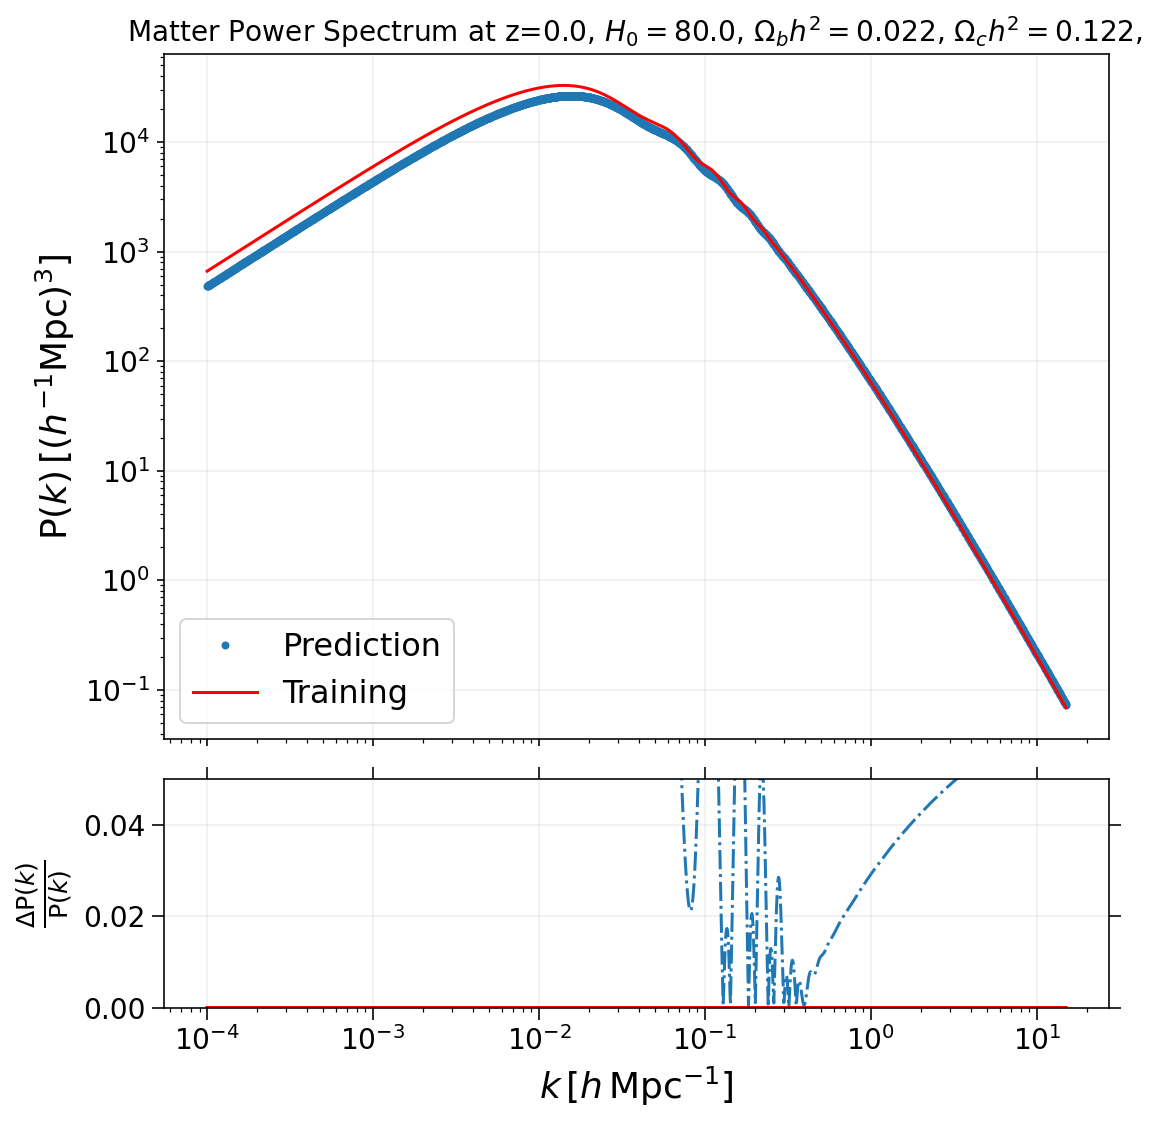

In [44]:
#Define func:

def calc_cosmo():
    input_cosmo_val = input('H0: 64.0 - 80.0 ')
    print("\n")
    user_list = input_cosmo_val.split()
    # print list
    print('parameter: ', user_list)

    # convert each item to float type
    for i in range(len(user_list)):
        # convert each item to int type
        user_list[i] = float(user_list[i])
        
    
    cosmo_arr = np.reshape(np.array(user_list),(1, 1))
    scaled = train_input_data.fit(cosmo_arr)
    input_scaled = scaled.transform(cosmo_arr)
    
    pred_rescaled_pk = scaled_output.inverse_transform(tf_model.predict(input_scaled))
    #Return to log scale for pred:
    pred_pk = np.exp(pred_rescaled_pk)
    
    def camb_cosmo2():
    
        #Compute P.S via CAMB:
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=cosmo_arr[0][0], ombh2=0.022, omch2=0.122)
        pars.InitPower.set_params(As = 2e-9, ns=0.965)
        pars.set_matter_power(redshifts=[0.0], kmax=10.0)
        pars.set_dark_energy(w=-1.0, wa=0, dark_energy_model='fluid')

        # Linear spectra
        pars.NonLinear = model.NonLinear_none
        results = camb.get_results(pars)
        camb_kh, z, camb_pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=15, npoints=2000)
        s8 = np.array(results.get_sigma8())
    
        return camb_kh, camb_pk[0] 
    
    generate_camb_ps = camb_cosmo2()
#     temp = generate_camb_ps

    print('H0:' , cosmo_arr[0][0])
    #print(pred_pk)
    
    fig, ax = plt.subplots(2,1, sharex=True, figsize = (8,8), gridspec_kw={'height_ratios': [3, 1]})                                            
    ax[0].loglog(generate_camb_ps[0], pred_pk[0], "C0.")                                    
    #plt.loglog(X_test, y_test, "C1d")
    ax[0].loglog(generate_camb_ps[0], generate_camb_ps[1], 'r')                              
    ax[0].set_title('Matter Power Spectrum at z=0.0, $H_{0} = %0.5s$, ' %cosmo_arr[0][0] + '$\Omega_{b}h^{2} = 0.022$, ' + '$\Omega_{c}h^{2} = 0.122$, ', fontsize = 14)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=16)
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.xlabel(r'$k\,[h\,\mathrm{Mpc}^{-1}]$')
    ax[0].set_ylabel(r'$\mathrm{P}(k)\, [(h^{-1}\mathrm{Mpc})^{3}]$')
    ax[0].legend(['Prediction', 'Training'], loc='lower left', fontsize=16);
    ax[0].grid(alpha=0.2)
    ax[1].grid(alpha=0.2)
    plt.tick_params(top=True,right=True, length=6)
    
#     #pred_pk needs to be sorted:
#     zipped_lists = zip(temp, pred_pk)
#     sorted_pairs = sorted(zipped_lists)

#     tuples = zip(*sorted_pairs)
#     temp, pred_pk = [list(tuple) for tuple in  tuples]
#     temp = np.array(temp)
#     pred_pk = np.array(pred_pk)
    
    #residual plot 
    ax[1].set_ylabel(r'$\frac{\Delta \mathrm{P}(k)}{\mathrm{P}(k)}$')
    ax[1].plot(generate_camb_ps[0], np.abs((pred_pk[0]-generate_camb_ps[1])/generate_camb_ps[1]), 'C0', linestyle="dashdot") 
    ax[1].plot(generate_camb_ps[0], np.abs((generate_camb_ps[1]-generate_camb_ps[1])/generate_camb_ps[1]), 'r')
    ax[1].set_yscale('linear')
    ax[1].set_ylim(0, 0.05)
    fig.tight_layout()
    #plt.savefig('power_spectrum_H0.pdf')
    plt.show()
    
    

Generate = calc_cosmo()